In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

def learn_embeddings_and_train(window_size, walk_length, num_walks):
    # Random walk strategy
    def random_walk(graph, start_node, walk_length, num_walks, window_size):
        walks = []
        for _ in range(num_walks):
            walk = [start_node]
            current_node = start_node
            for _ in range(walk_length - 1):
                neighbors = list(graph.neighbors(current_node))
                if len(neighbors) == 0:
                    break
                # 在随机游走过程中随机选择邻居节点，考虑窗口大小参数
                next_node = random.choice(neighbors[:window_size])
                walk.append(next_node)
                current_node = next_node
            walks.append(walk)
        return walks

    # Step 1: Load Cora dataset
    # Load Cora dataset into a networkx graph
    G = nx.read_edgelist('./cora/cora.cites')
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    # Step 2: Learn node embeddings using DeepWalk
    # Perform random walks on the graph
    walks = []
    for node in G.nodes():
        walks.extend(random_walk(G, node, walk_length, num_walks, window_size))
    print("Number of walks:", len(walks))

    # Train Word2Vec model on the walks to learn node embeddings
    model = Word2Vec(walks, vector_size=128, window=window_size, min_count=0, sg=1, workers=4)

    # Step 3: Prepare training data
    X = []
    map_strategy = {
        'Theory':0,
        'Neural_Networks':1,
        'Reinforcement_Learning':2,
        'Case_Based':3,
        'Genetic_Algorithms':4,
        'Probabilistic_Methods':5,
        'Rule_Learning':6
    }
    labels = []
    # Assuming labels are available in a separate file
    with open('./cora/cora.content', 'r') as f:
        for line in f:
            parts = line.strip().split()
            node_id = parts[0]
            label = parts[-1]  # Assuming label is the last element in each line
            labels.append(map_strategy[label])
    for node in G.nodes():
        X.append(model.wv[node])

    # Normalize features
    from sklearn.preprocessing import Normalizer
    normalizer = Normalizer(norm='l2')
    X_normalized = normalizer.fit_transform(X)

    # Step 4: Train SVM classifier
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, labels, test_size=0.2, random_state=42)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Step 5: Evaluate model
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Visualize initial and processed embeddings
    initial_embeddings = np.array(X)
    processed_embeddings = X_normalized

    # Convert labels to colors
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange', 'purple', 'brown'])  # Define your colormap here

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(initial_embeddings[:, 0], initial_embeddings[:, 1], c=labels, cmap=cmap)
    plt.title("Initial Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.scatter(processed_embeddings[:, 0], processed_embeddings[:, 1], c=labels, cmap=cmap)
    plt.title("Processed Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


Number of nodes: 2708
Number of edges: 5278
Number of walks: 27080
Accuracy: 0.3173431734317343


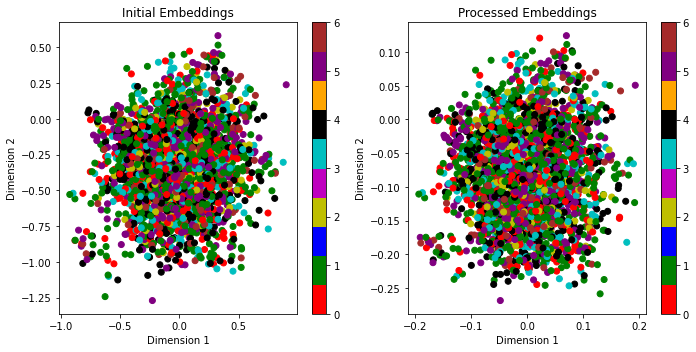

In [8]:
learn_embeddings_and_train(window_size=5, walk_length=40, num_walks=10)

Number of nodes: 2708
Number of edges: 5278
Number of walks: 27080
Accuracy: 0.3173431734317343


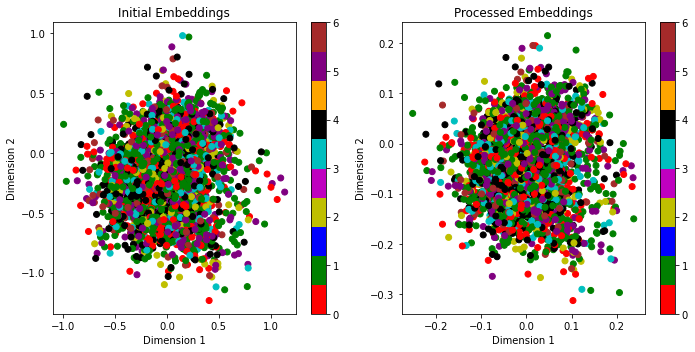

In [9]:
learn_embeddings_and_train(window_size=10, walk_length=80, num_walks=10)

Number of nodes: 2708
Number of edges: 5278
Number of walks: 216640
Accuracy: 0.3173431734317343


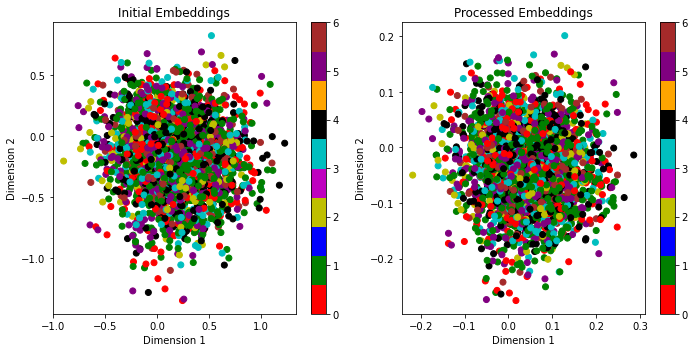

In [10]:
learn_embeddings_and_train(window_size=10, walk_length=40, num_walks=80)